# Costumers Clusters
## Author : HoomanKaseban ( Mr.Programmer)

#### In this project, we are going to categorize the store's customers into different clusters based on their spending score

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Read The Csv File

### This File Contains the information of  customers of a shop
<ul>
    <li> <i>First Column : </i><b>CustomerID :</b>
        <i style="color:red;font-family:arial;font-weight:bold">We use ID to anonymize people's names</i>
    </li>
    <li><i>Second Column : </i><b>Gender :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Customer's gender</i>
    </li>
    <li><i>Third Column : </i><b>Age :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Customer's age</i>
    </li>
    <li><i>Forth Column : </i><b>Annual Income :</b>
        <i style="color:red;font-family:arial;font-weight:bold">Customer's annual income</i>
    </li>
    <li><i>Fifth Column : </i><b>Spending Score (1-100) :</b>
        <i style="color:red;font-family:arial;font-weight:bold">The score given by the seller based on customer's purchases</i>
    </li>
</ul>

In [2]:
df_main=pd.read_csv('1632560262896716.csv')
df_main.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Create Costumized DataFrame
### We don't need ID & Gender (it's useless)

In [3]:
df=df_main[['Age','Annual Income (k$)','Spending Score (1-100)']]
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Cleaning The Rows That Have NaN Column ( If Exist ! )

In [4]:
df.shape

(200, 3)

In [5]:
df.dropna(inplace=True)

C:\Users\Mr.Programmer\AppData\Local\Temp\ipykernel_7808\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [6]:
df.shape

(200, 3)

# Convert PandasDF to NumpyAR

In [7]:
x=np.asanyarray(df)
x[:3]

array([[19, 15, 39],
       [21, 15, 81],
       [20, 16,  6]], dtype=int64)

# Normalizing Datas

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler().fit(x)
norm=scaler.transform(x)
norm[:3]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298]])

# 
# 
# **** Machine Learning ***

# 
# Clustering with K-Means (For this project,it's the BEST way)

In [10]:
# import the main tools
from sklearn.cluster import KMeans as km
from sklearn import preprocessing as prp

# Use Elbow Method to Find The Best K
<p style="color:blue;font-family:timesnewroman;font-size:17pt;font-weight:bold">
    The "Elbow Method" is a well-known method for finding the best k in K-Means
</p>
<a href='https://predictivehacks.com/k-means-elbow-method-code-for-python/#:~:text=K-Means%20is%20an%20unsupervised,optimal%20for%20the%20specific%20case' target='blank'><br>Click to Get more Informations!</a>

In [11]:
#Get the Distortions Matrix to use in elbow plot!
distortions=[]
K=range(1,10)
for k in K:
    kmeanmodel=km(n_clusters=k)
    kmeanmodel.fit(norm)
    distortions.append(kmeanmodel.inertia_)
distortions

C:\Users\Mr.Programmer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[600.0,
 389.3861889564371,
 295.45624492135573,
 205.22514747675922,
 168.24758017556837,
 133.86842085478852,
 117.17517978708025,
 104.02116700198584,
 92.2664773736451]

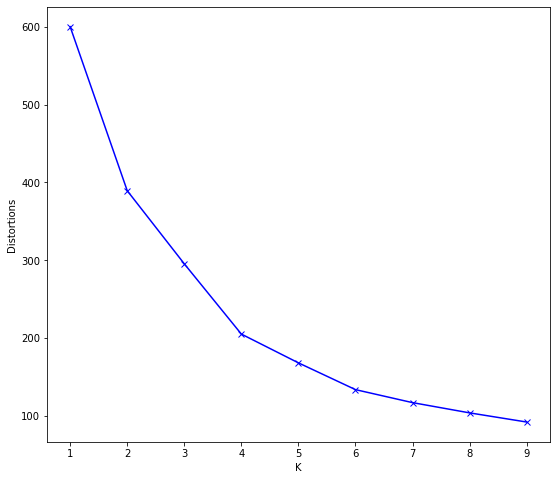

In [12]:
#Ploting Distortions-K and find the elobw
plt.figure(figsize=(9,8))
plt.plot(K,distortions,'bx-')
plt.xlabel('K')
plt.ylabel('Distortions')
plt.show()

### English Description
## As shown in the Plot, we reach the elbow in K=4
## and we can guess with high accuracy that the best number of clusters is 4.
### Persian Description
## همانطور که در نمودار مشخص است است در همسایگی برابر با 4 به آرنج می رسیم و میتوانیم
## حدس با دقت بالایی بزنیم که بهترین تعداد کلاستر ، 4 عدد است
# 
# 
# Modeling

In [13]:
knum=4 #number of cluaters
# create model
kmean=km(init='k-means++',n_clusters=knum,n_init=10)
kmean.fit(norm)
labels=kmean.labels_
# get overview of labels
print(labels)

[0 0 0 0 0 0 3 0 3 0 3 0 3 0 3 0 0 0 3 0 0 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 3 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 3 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 1 0 0 0 3 3 3 3 0 1 2 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


### Find The Center of Clusters

In [14]:
centers=kmean.cluster_centers_
centers

array([[-0.96249203, -0.78476346,  0.39202966],
       [ 0.03720536,  0.99011499, -1.18875705],
       [-0.42880597,  0.97484722,  1.21608539],
       [ 1.08616125, -0.49056525, -0.39717443]])

## Create Column of K-Mean Model's Label

In [15]:
df['K-means Label']=labels
df.head()

C:\Users\Mr.Programmer\AppData\Local\Temp\ipykernel_7808\3778044142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['K-means Label']=labels


,Age,Annual Income (k$),Spending Score (1-100),K-means Label
0,19,15,39,0
1,21,15,81,0
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


## Get the approximate Information of centers

In [16]:
df.groupby('K-means Label').mean()

,Age,Annual Income (k$),Spending Score (1-100)
K-means Label,,,
0,25.438596,40.000000,60.298246
1,39.368421,86.500000,19.578947
2,32.875000,86.100000,81.525000
3,53.984615,47.707692,39.969231


# Describe Labels:

### English Description
### We clustered our data into 4 clusters
## Cluster 0: young people with low income and average to high spending score
## Cluster 2: Adults with high income and excellent spending score
## Cluster 3: middle-aged with high income and very low spending score
## Cluster 1: Elderly people with low income and average to low spending score
## Approximate conclusion
<p style='color:red;font-weight:bold'> It can be generally assumed that people under the age of 35, who are generally single, have a high spending score with any income level.</p>
<br>
<p style='color:red;font-weight:bold'>And on the other hand, people over 35 years old, who are generally married, do not have a good spending score with any level of income.</p>


#  
### Persian Description
### ما دیتای خود را به 4 خوشه ، خوشه بندی کردیم
## خوشه 0 : جوانان با درآمد پایین و نمره خرج کرد متوسط به بالا
## خوشه 2 : بزرگسالان با درآمد بالا و نمره خرج کرد عالی
## خوشه 3 : میانسالان با درآمد بالا و نمره خرج کرد خیلی پایین
## خوشه 1 : افراد مسن با درآمد پایین و نمره خرج کرد متوسط به پایین 
<p style='color:red;font-weight:bold;font-size:15pt'>می توان به طور کلی حدس زد که افراد زیر 35 سال که عموما مجرد هستند، با هرسطح درآمدی نمره خرج کرد بالا دارند
</p>
<br>
<p style='color:red;font-weight:bold;font-size:15pt'>و در مقابل افراد بالای 35 سال که عموما متاهل هستند ، با هرسطح در آمدی نمره خرج کرد خوبی ندارند
</p>

# 
# 
# 
# Create The Plot

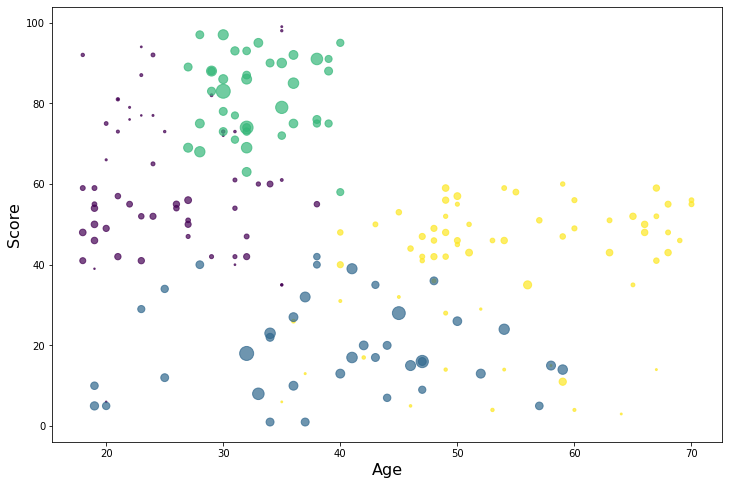

In [17]:
plt.figure(figsize=(12,8))

# we use 'area' to highlight the persons who have higher income
area=np.pi*(x[:,1]**2)

# Create Age-Score Plot
plt.scatter(x[:,0],x[:,2],s=area/300,c=labels.astype(float),alpha=0.7)

plt.xlabel('Age',fontsize=16)
plt.ylabel('Score',fontsize=16)
plt.show()

# Plot Describe:
### English Description
## It can be seen in the Plot that most of the high spending scores were given to people under 30 years old (excluding income!)
## Between the ages of 30 and 50, the scores of spending are average and low
## People aged 50 and above also mostly have average spending scores
## Of course, there is a defect in the diagram: the problem of mixing two clusters between the ages of 40 and 60.
### But In general, the clustering is done well
# 
### Persian Description
## می شود در نمودار دید که اکثر نمرات خرج کرد بالا به افراد زیر 30 سال تعلق گرفته (فارغ از درآمد!)
## بین سنین 30 تا 50 سالگی نمرات خرج کرد متوسط و پایین است
## افراد با سنین 50 به بالا نیز بیشتر دارای نمرات متوسط خرج کرد می شوند
## البته نقصی در نمودار به چشم می آید :  مشکل قاطی شدن دو کلاستر در سن 40 تا 60 
### میتوان به طور کلی گفت که کلاسترینگ خوب انجام شده 

# 
# 
# 
# Create 3D Plot
## Get a better and more accurate view of the Clusters

C:\Users\Mr.Programmer\AppData\Local\Temp\ipykernel_7808\1922838910.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=d3(fig,rect=[0,0,1,1],elev=20,azim=200)


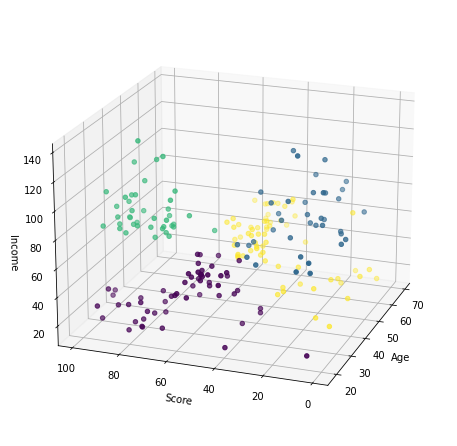

In [18]:
from mpl_toolkits.mplot3d import Axes3D as d3
fig=plt.figure(1,figsize=(8,6))
plt.clf()
ax=d3(fig,rect=[0,0,1,1],elev=20,azim=200)
plt.cla()
ax.set_xlabel('Age')
ax.set_ylabel('Score')
ax.set_zlabel('Income')
ax.scatter(x[:,0],x[:,2],x[:,1],c=labels.astype(float))
plt.show()

## Author : HoomanKaseban
#### Note:All this project is built and planned by Hooman Kaseban. No piece of code has been taken from any site or person.
#### Credit:All credits of this code are for Hooman Kaseban and are free for public use.
# The END